In [10]:

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder , StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import Perceptron    # Used for simple linear classification tasks.

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from tensorflow.keras.models import Sequential     # Sequential lets you build a neural network layer-by-layer in Keras.

from tensorflow.keras.layers import Dense     #Dense makes the final predictions
from tensorflow.keras.layers import Conv2D     # Conv2D extracts features
from tensorflow.keras.layers import Flatten    # Flatten reshapes them

from tensorflow.keras.layers import MaxPooling2D     # MaxPooling2D reduces size
from tensorflow.keras.layers import Dropout          # Dropout prevents overfitting

from tensorflow.keras.utils import to_categorical     # converts numeric class labels into one-hot encoded format for training classification models
     

In [11]:
df = pd.read_csv("/kaggle/input/mnist-in-csv/mnist_train.csv")
df_test = pd.read_csv("/kaggle/input/mnist-in-csv/mnist_test.csv")


In [12]:

df.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:

df.shape

(60000, 785)

In [14]:

df.columns

Index(['label', '1x1', '1x2', '1x3', '1x4', '1x5', '1x6', '1x7', '1x8', '1x9',
       ...
       '28x19', '28x20', '28x21', '28x22', '28x23', '28x24', '28x25', '28x26',
       '28x27', '28x28'],
      dtype='object', length=785)

In [15]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 785 entries, label to 28x28
dtypes: int64(785)
memory usage: 359.3 MB


In [16]:
df.isnull().sum()

label    0
1x1      0
1x2      0
1x3      0
1x4      0
        ..
28x24    0
28x25    0
28x26    0
28x27    0
28x28    0
Length: 785, dtype: int64

In [17]:
#preprocess
X_train = df.drop("label", axis=1).values
y_train = df["label"].values
X_test = df_test.drop("label", axis=1).values
y_test = df_test["label"].values
     

In [18]:

X_train = X_train.astype("float32") / 255.0
X_test = X_test.astype("float32") / 255.0

In [19]:

X_train_img = X_train.reshape(-1, 28, 28)
X_test_img = X_test.reshape(-1, 28, 28)

In [20]:

y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)

In [22]:
perceptron = Sequential([
    Flatten(input_shape=(28,28)),
    Dense(10, activation="softmax")
])
  

In [23]:


perceptron.compile(optimizer="sgd", loss="categorical_crossentropy", metrics=["accuracy"])

In [25]:
history_percp = perceptron.fit(X_train_img, y_train_cat, epochs=5, batch_size=32, validation_data=(X_test_img, y_test_cat), verbose=1)
     


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7098 - loss: 1.1414 - val_accuracy: 0.8800 - val_loss: 0.4810
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8764 - loss: 0.4766 - val_accuracy: 0.8933 - val_loss: 0.4003
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8904 - loss: 0.4077 - val_accuracy: 0.9017 - val_loss: 0.3691
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8961 - loss: 0.3819 - val_accuracy: 0.9052 - val_loss: 0.3484
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8986 - loss: 0.3646 - val_accuracy: 0.9094 - val_loss: 0.3365


In [27]:
acc_percp = perceptron.evaluate(X_test_img, y_test_cat, verbose=0)[1]
     

In [28]:

acc_percp
     

0.9093999862670898

In [29]:

#ANN
ann = Sequential([
    Flatten(input_shape=(28,28)),
    Dense(128, activation="relu"),
    Dense(64, activation="relu"),
    Dense(10, activation="softmax")
])
     

In [30]:

ann.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

In [31]:
history_ann = ann.fit(X_train_img, y_train_cat, epochs=5, batch_size=32, validation_data=(X_test_img, y_test_cat), verbose=1)
     

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8756 - loss: 0.4228 - val_accuracy: 0.9637 - val_loss: 0.1149
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9686 - loss: 0.1047 - val_accuracy: 0.9682 - val_loss: 0.1027
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9789 - loss: 0.0702 - val_accuracy: 0.9763 - val_loss: 0.0766
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9834 - loss: 0.0513 - val_accuracy: 0.9772 - val_loss: 0.0781
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9880 - loss: 0.0387 - val_accuracy: 0.9769 - val_loss: 0.0780


In [32]:
acc_ann = ann.evaluate(X_test_img, y_test_cat, verbose=0)[1]

In [33]:

acc_ann



0.9768999814987183

In [34]:
X_train_cnn = X_train.reshape(-1, 28, 28,1)
X_test_cnn = X_test.reshape(-1, 28, 28, 1)

In [35]:

cnn = Sequential([
    Conv2D(32, kernel_size=(3,3), activation="relu", input_shape=(28,28,1)),
    MaxPooling2D(pool_size=(2,2)),
    Conv2D(64, kernel_size=(3,3), activation="relu"),
    MaxPooling2D(pool_size=(2,2)),
    Flatten(),
    Dense(128, activation="relu"),
    Dropout(0.5),
    Dense(10, activation="softmax")
])

In [36]:

cnn.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

In [37]:

history_cnn = cnn.fit(X_train_cnn, y_train_cat, epochs=5, batch_size=32, validation_data=(X_test_cnn, y_test_cat), verbose=1)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 33s 17ms/step - accuracy: 0.8670 - loss: 0.4219 - val_accuracy: 0.9844 - val_loss: 0.0484
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 31s 16ms/step - accuracy: 0.9755 - loss: 0.0853 - val_accuracy: 0.9880 - val_loss: 0.0356
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 31s 16ms/step - accuracy: 0.9809 - loss: 0.0623 - val_accuracy: 0.9910 - val_loss: 0.0276
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 31s 16ms/step - accuracy: 0.9859 - loss: 0.0475 - val_accuracy: 0.9916 - val_loss: 0.0260
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 32s 17ms/step - accuracy: 0.9879 - loss: 0.0394 - val_accuracy: 0.9921 - val_loss: 0.0253


In [38]:


acc_cnn = cnn.evaluate(X_test_cnn, y_test_cat, verbose=0)[1]

In [39]:

acc_cnn
     

0.9921000003814697

In [40]:

def plot_training(history, title):
    plt.figure(figsize=(12,4))
    plt.subplot(1,2,1)
    plt.plot(history.history['accuracy'], label="Train")
    plt.plot(history.history['val_accuracy'], label="Val")
    plt.title(f"{title} Accuracy")
    plt.legend()

    plt.subplot(1,2,2)
    plt.plot(history.history['loss'], label="Train")
    plt.plot(history.history['val_loss'], label="Val")
    plt.title(f"{title} Loss")
    plt.legend()
    plt.show()

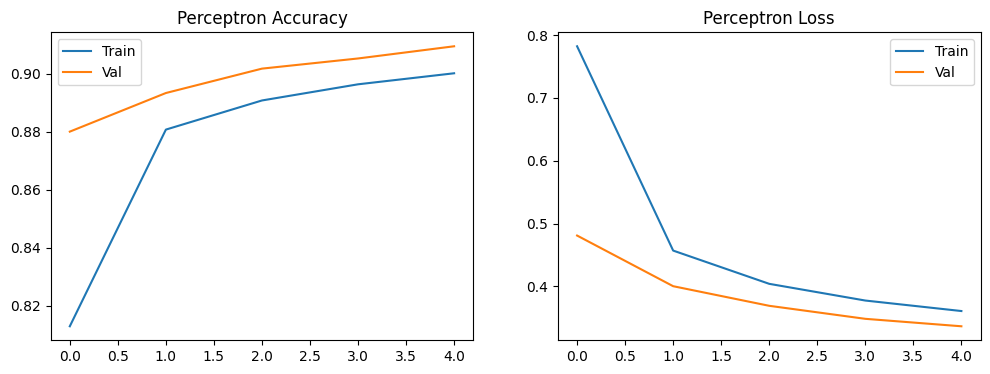

In [41]:

plot_training(history_percp, "Perceptron")

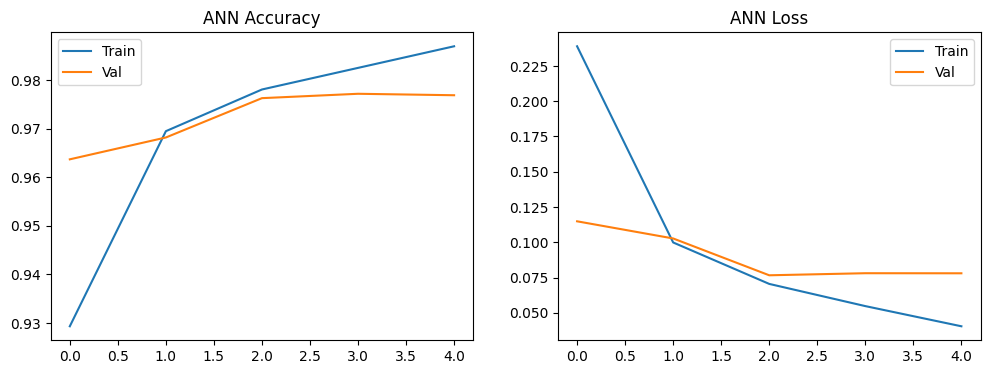

In [42]:


plot_training(history_ann, "ANN")

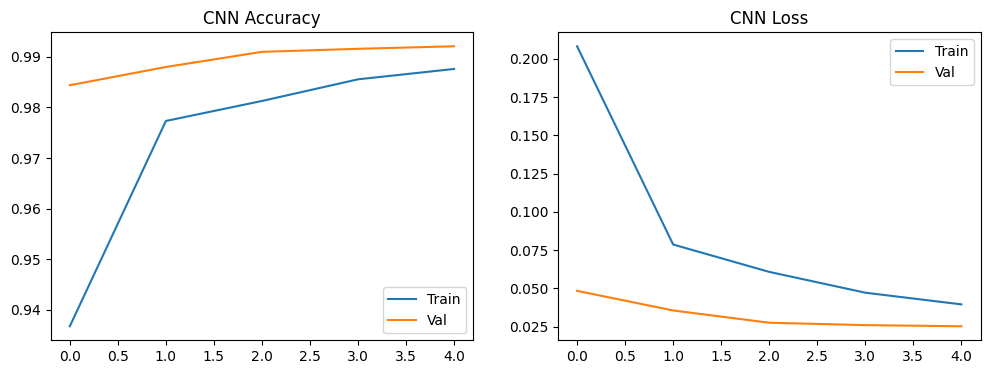

In [43]:

plot_training(history_cnn, "CNN")

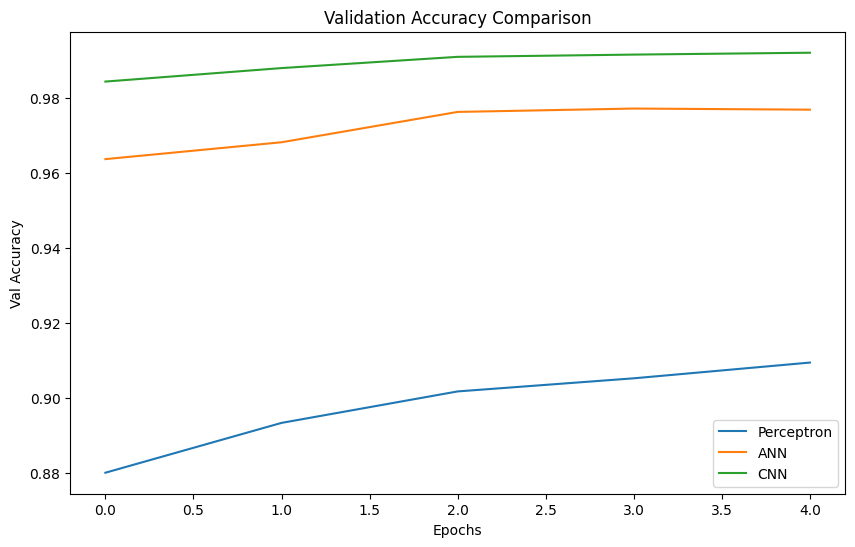

In [44]:

plt.figure(figsize=(10,6))
plt.plot(history_percp.history['val_accuracy'], label="Perceptron")
plt.plot(history_ann.history['val_accuracy'], label="ANN")
plt.plot(history_cnn.history['val_accuracy'], label="CNN")
plt.title("Validation Accuracy Comparison")
plt.xlabel("Epochs")
plt.ylabel("Val Accuracy")
plt.legend()
plt.show()
     

In [46]:
def show_side_by_side(models, model_names, X, X_cnn, y_true, n=5):
    idxs = np.random.choice(len(X), n, replace=False)
    plt.figure(figsize=(15, 6))
    for i, idx in enumerate(idxs):
        plt.subplot(2, n, i+1)
        plt.imshow(X[idx].reshape(28, 28), cmap="gray")
        plt.axis("off")
        plt.title(f"True: {y_true[idx]}")
        preds = [np.argmax(model.predict(X_cnn[idx].reshape(1, 28, 28, 1) if name == "CNN" else X[idx].reshape(1, 28, 28)))
                 for model, name in zip(models, model_names)]
        plt.subplot(2, n, n+i+1)
        plt.axis("off")
        plt.title("\n".join(f"{n}: {p}" for n, p in zip(model_names, preds)))
    plt.tight_layout()
    plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


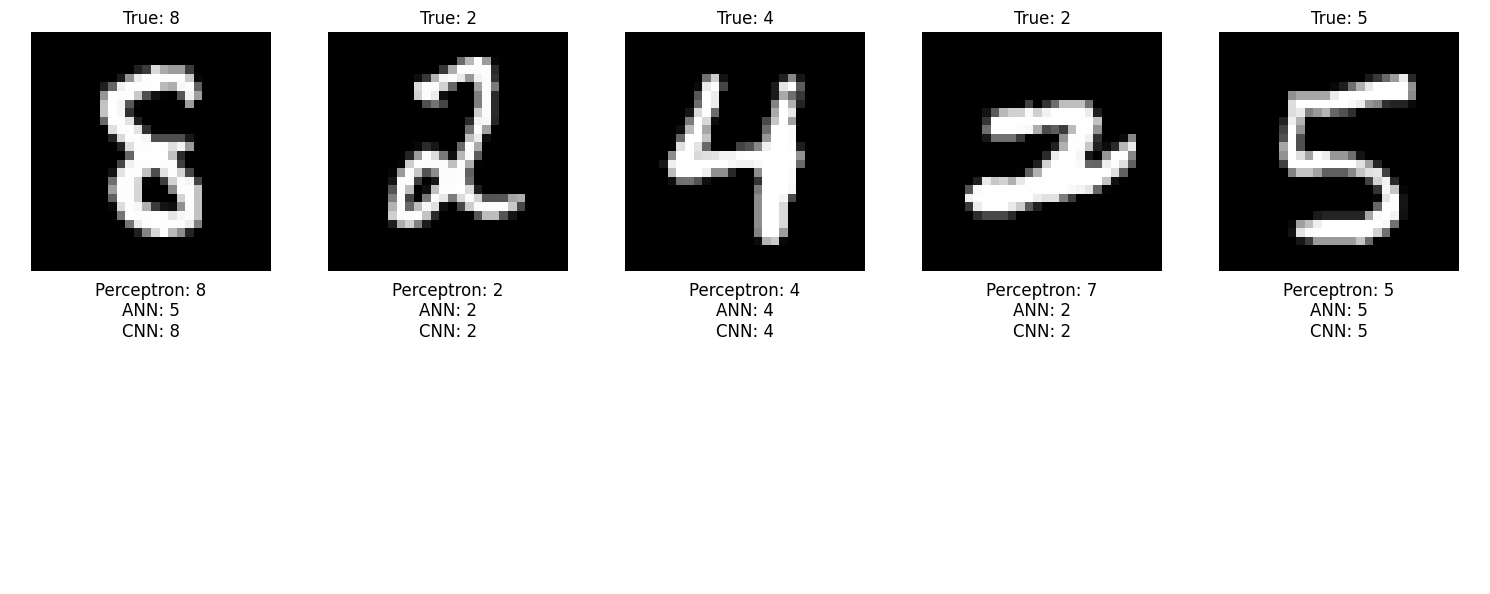

In [47]:

show_side_by_side([perceptron, ann, cnn], ["Perceptron", "ANN", "CNN"], X_test_img, X_test_cnn, y_test, 5)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


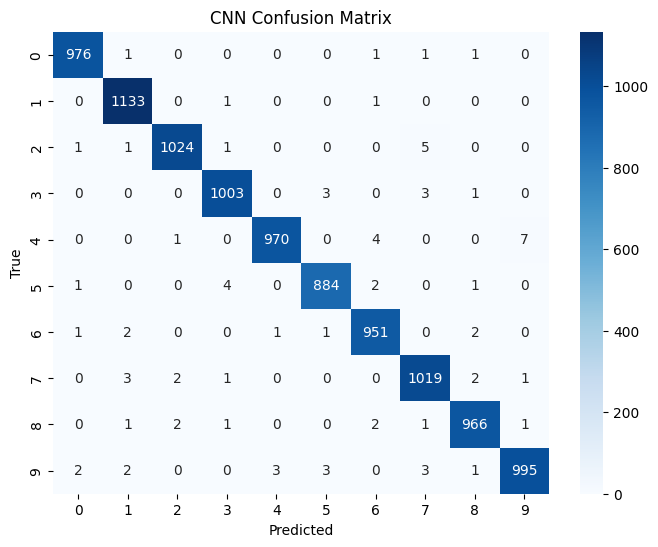

In [48]:

y_pred_cnn = np.argmax(cnn.predict(X_test_cnn), axis=1)
cm = confusion_matrix(y_test, y_pred_cnn)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("CNN Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()
     

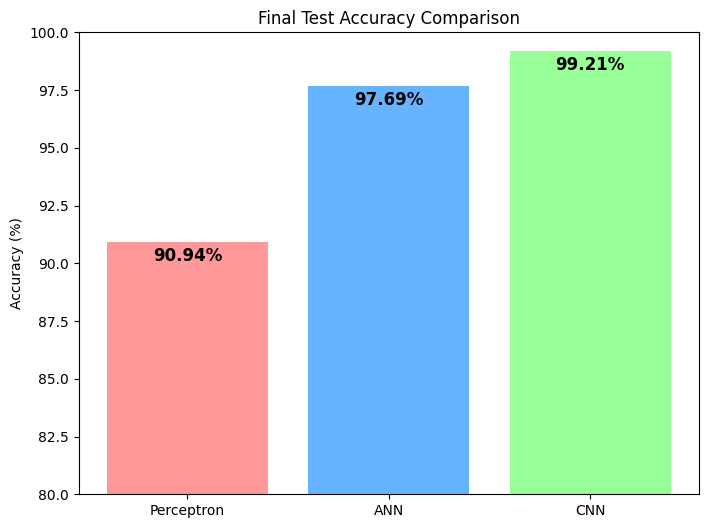

In [49]:
final_accs = [acc_percp*100, acc_ann*100, acc_cnn*100]
models = ["Perceptron", "ANN", "CNN"]

plt.figure(figsize=(8,6))
bars = plt.bar(models, final_accs, color=['#ff9999','#66b3ff','#99ff99'])
plt.title("Final Test Accuracy Comparison")
plt.ylabel("Accuracy (%)")
for bar, acc in zip(bars, final_accs):
    plt.text(bar.get_x()+bar.get_width()/2, bar.get_height()-1, f"{acc:.2f}%",
             ha='center', va='bottom', fontsize=12, fontweight='bold')
plt.ylim(80, 100)
plt.show()